<a href="https://colab.research.google.com/github/mavillot/FUNSD-Information-Extraction/blob/main/Detection/YOLO/yolov4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

Do not worry about any warnings when you run the '!make' cell!

In [1]:
%%capture
!git clone https://github.com/AlexeyAB/darknet

In [2]:
%%capture
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [3]:
%%capture
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

In [4]:
%%capture
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

In [5]:
%%capture
!apt-get install tree

### Funciones para mostrar las imágenes

In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def mostrarImagen(imagePath):
  image = cv2.imread(imagePath)
  if len(image.shape)==3:
    img2 = image[:,:,::-1]
    plt.figure(figsize=(20,15))
    plt.imshow(img2)
    plt.show()
  else:
    img2 = image
    plt.figure(figsize=(20,15))
    plt.imshow(img2,cmap='gray')
    plt.show()

def mostrarImagenConAnotacion(imagePath,annotationPath,classesPath):
    image = cv2.imread(imagePath)
    (H,W)=image.shape[:2]
    with open(annotationPath) as f:
        lines = f.readlines()
    with open(classesPath) as f:
        clases = f.readlines()
    for annot in lines:
        (c,x,y,w,h) = annot.split(' ')
        cv2.rectangle(image,(int((float(x)-float(w)/2)*W),int((float(y)-float(h)/2)*H)),(int((float(x)+float(w)/2)*W),int((float(y)+float(h)/2)*H)),(0,255,0),10)
        cv2.putText(image,clases[int(c)],(int((float(x)-float(w)/2)*W),int((float(y)-float(h)/2)*H-2)),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
    img2 = image[:,:,::-1]
    plt.imshow(img2)
    plt.show()



This step downloading the dataset

## Files

In [7]:
%%capture
!wget https://www.dropbox.com/s/wxzrfb5wtdgdgi8/funsd_last.weights?dl=0 -O funsd_last.weights
!wget https://www.dropbox.com/s/2hdgc14avqle31s/funsd.cfg?dl=0 -O funsd.cfg
!wget https://www.dropbox.com/s/eaf1sp3k1xoig7h/funsd.data?dl=0 -O funsd.data
!wget https://www.dropbox.com/s/vwxyeohq1amz369/funsd.names?dl=0 -O funsd.names
!wget https://guillaumejaume.github.io/FUNSD/dataset.zip -O dataset.zip
!unzip dataset.zip

### cfg File
Copy the cfg file in another directory

In [8]:
!cp funsd.cfg ./cfg

# Predictions!!!
You have done it! You now have a custom object detector to make your very own detections. Time to test it out and have some fun!

Para hacer predicciones hace falta cambiar alguna cosa del fichero cfg

In [9]:
%cd cfg
!sed -i 's/batch=64/batch=1/' funsd.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' funsd.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [10]:
import imutils 
img=cv2.imread('dataset/testing_data/images/82092117.png')
imageOut1 = imutils.resize(img,width=700)
cv2.imwrite('1.png', imageOut1) 

True

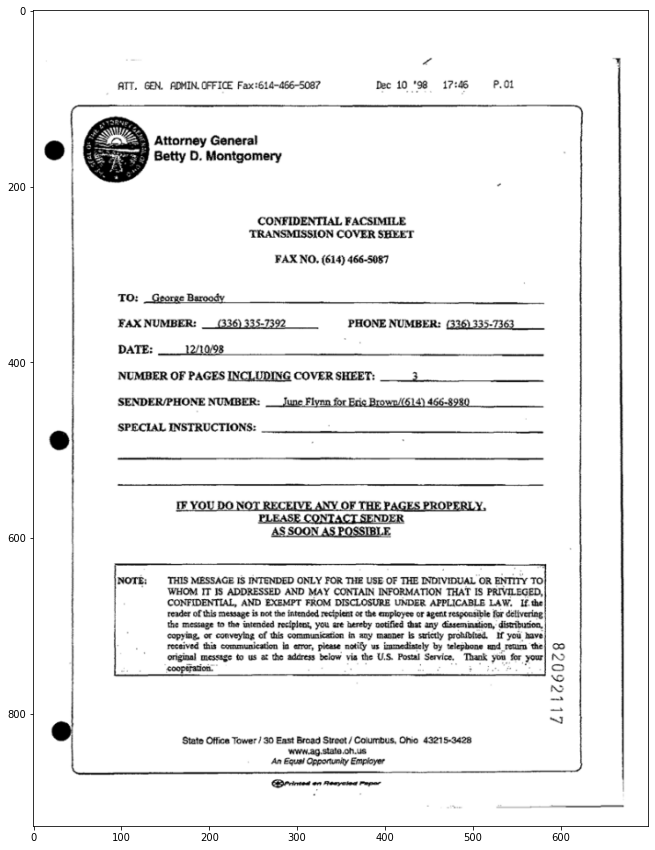

In [11]:
mostrarImagen('1.png')

In [12]:
!./darknet detector test funsd.data cfg/funsd.cfg funsd_last.weights 1.png -thresh 0.3

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    640 x 640 x   3 ->  640 x 640 x  32 0.708 BF
   1 conv     80       3 x 3/ 2    640 x 640 x  32 ->  320 x 320 x  80 4.719 BF
   2 conv     40       1 x 1/ 1    320 x 320 x  80 ->  320 x 320 x  40 0.655 BF
   3 conv     80       3 x 3/ 1    320 x 320 x  40 ->  320 x 320 x  80 5.898 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 320 x 320 x  80 0.008 BF
   5 conv    160       3 x 3/ 2    320 x 320 x  80 ->  160 x 160 x 160 5.898 BF
   6 conv     80       1 x 1/ 1    160 x 160 x 160 ->  160 x 160 x  80 0.655 BF
   7 route  5 		                           ->  160 x 160 x 160 

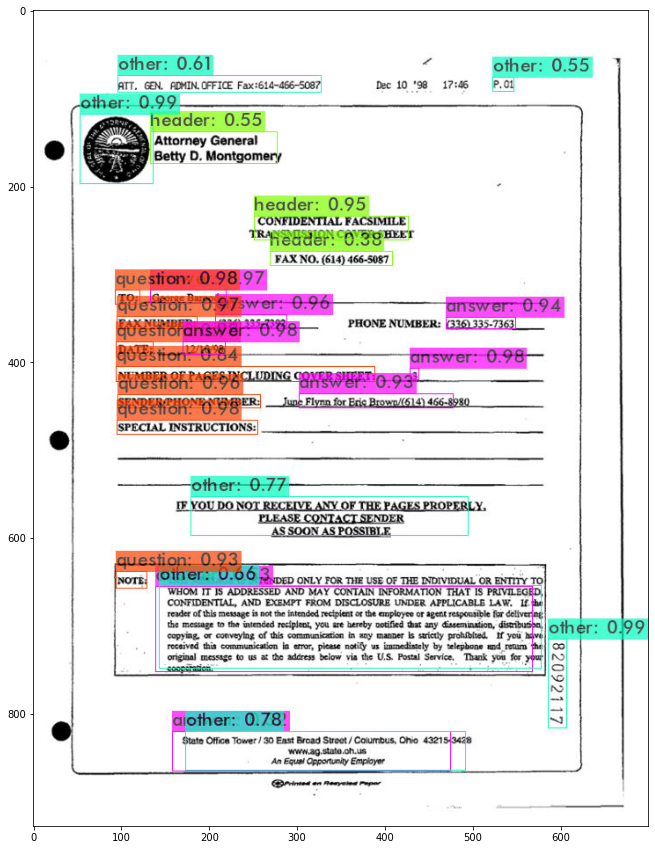

In [13]:
mostrarImagen('predictions.jpg')

In [14]:
img=cv2.imread('/content/darknet/dataset/testing_data/images/82200067_0069.png')
imageOut1 = imutils.resize(img,width=700)
cv2.imwrite('2.png', imageOut1) 

True

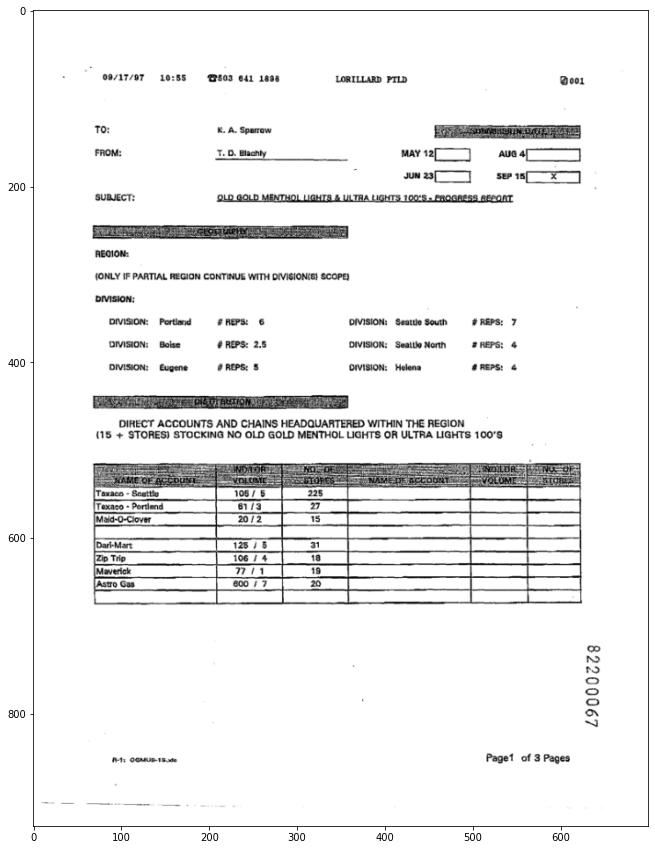

In [15]:
mostrarImagen('2.png')

In [16]:
!./darknet detector test funsd.data cfg/funsd.cfg funsd_last.weights 2.png -thresh 0.3

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    640 x 640 x   3 ->  640 x 640 x  32 0.708 BF
   1 conv     80       3 x 3/ 2    640 x 640 x  32 ->  320 x 320 x  80 4.719 BF
   2 conv     40       1 x 1/ 1    320 x 320 x  80 ->  320 x 320 x  40 0.655 BF
   3 conv     80       3 x 3/ 1    320 x 320 x  40 ->  320 x 320 x  80 5.898 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 320 x 320 x  80 0.008 BF
   5 conv    160       3 x 3/ 2    320 x 320 x  80 ->  160 x 160 x 160 5.898 BF
   6 conv     80       1 x 1/ 1    160 x 160 x 160 ->  160 x 160 x  80 0.655 BF
   7 route  5 		                           ->  160 x 160 x 160 

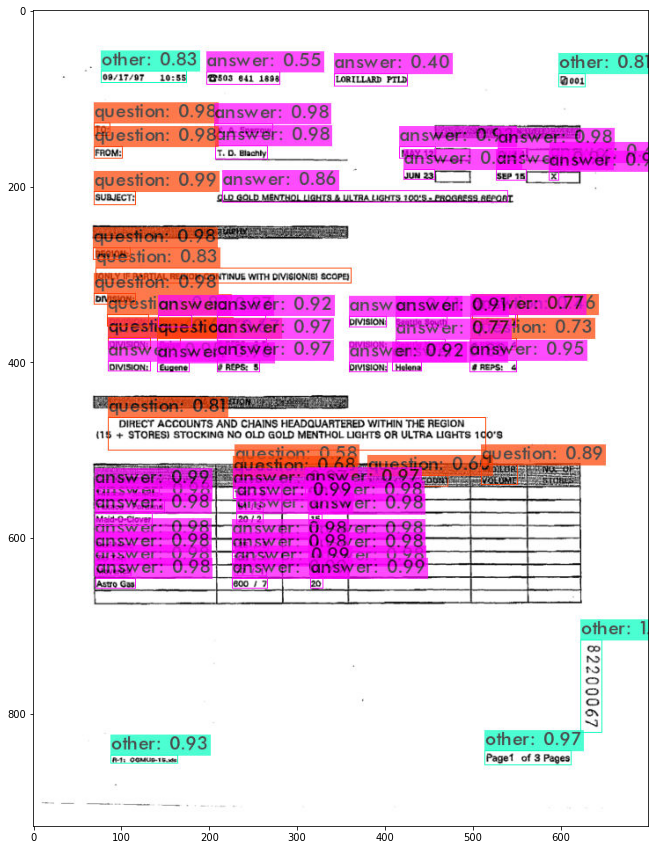

In [17]:
mostrarImagen('predictions.jpg')

In [18]:
! wget https://templates.invoicehome.com/invoice-template-us-classic-white-750px.png -O prueba.png

--2021-05-27 08:15:42--  https://templates.invoicehome.com/invoice-template-us-classic-white-750px.png
Resolving templates.invoicehome.com (templates.invoicehome.com)... 99.86.91.108, 99.86.91.13, 99.86.91.119, ...
Connecting to templates.invoicehome.com (templates.invoicehome.com)|99.86.91.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22010 (21K) [image/png]
Saving to: ‘prueba.png’

prueba.png          100%[===================>]  21.49K  --.-KB/s    in 0.001s  

2021-05-27 08:15:42 (38.2 MB/s) - ‘prueba.png’ saved [22010/22010]



In [19]:
!./darknet detector test funsd.data cfg/funsd.cfg funsd_last.weights prueba.png -thresh 0.3

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    640 x 640 x   3 ->  640 x 640 x  32 0.708 BF
   1 conv     80       3 x 3/ 2    640 x 640 x  32 ->  320 x 320 x  80 4.719 BF
   2 conv     40       1 x 1/ 1    320 x 320 x  80 ->  320 x 320 x  40 0.655 BF
   3 conv     80       3 x 3/ 1    320 x 320 x  40 ->  320 x 320 x  80 5.898 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 320 x 320 x  80 0.008 BF
   5 conv    160       3 x 3/ 2    320 x 320 x  80 ->  160 x 160 x 160 5.898 BF
   6 conv     80       1 x 1/ 1    160 x 160 x 160 ->  160 x 160 x  80 0.655 BF
   7 route  5 		                           ->  160 x 160 x 160 

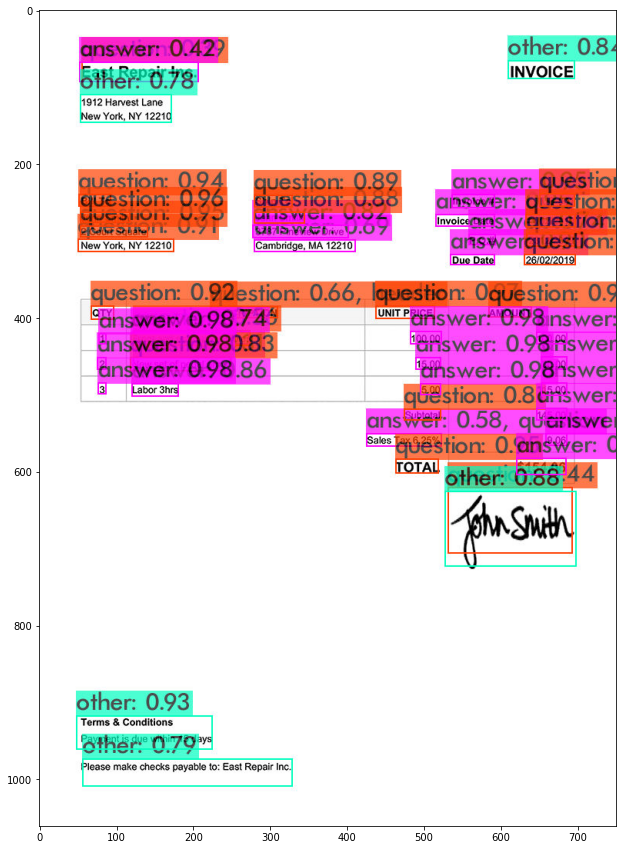

In [20]:
mostrarImagen('predictions.jpg')

In [ ]:
!unzip FUNSDdataset.zip

In [28]:
from pathlib import Path
import os
path='FUNSDdataset/test'
files = [Path(str(path)+'/'+p) for p in os.listdir(path) if p[-1]=='g']

In [ ]:
files

In [30]:
txt=open('test.txt','w')
for f in files:
  txt.write(str(f)+'\n')
txt.close() 

In [31]:
txt=open('classes.data','w')
txt.write('classes = 4\n')
txt.write('train  = train.txt\n')
txt.write('valid  = test.txt\n')
txt.write('names = funsd.names\n')
txt.write('backup = FUNSDdataset/\n')
txt.close() 

In [32]:
!./darknet detector map classes.data cfg/funsd.cfg funsd_last.weights -iou_thresh 0.50 -points 101

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    640 x 640 x   3 ->  640 x 640 x  32 0.708 BF
   1 conv     80       3 x 3/ 2    640 x 640 x  32 ->  320 x 320 x  80 4.719 BF
   2 conv     40       1 x 1/ 1    320 x 320 x  80 ->  320 x 320 x  40 0.655 BF
   3 conv     80       3 x 3/ 1    320 x 320 x  40 ->  320 x 320 x  80 5.898 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 320 x 320 x  80 0.008 BF
   5 conv    160       3 x 3/ 2    320 x 320 x  80 ->  160 x 160 x 160 5.898 BF
   6 conv     80       1 x 1/ 1    160 x 160 x 160 ->  160 x 160 x  80 0.655 BF
   7 route  5 		                           ->  160 x 160 x 160 